In [78]:
import pandas as pd
import numpy as np
import sklearn.metrics as skl
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
data = pd.read_csv("data/cleaned_train_with_geo_distance.csv")

In [80]:
data.shape
data

,fare_amount,passenger_count,isAirport,year,hour,distance
0,4.50,1,0,2009,17,0.640494
1,16.90,1,0,2010,16,5.250728
2,5.70,2,0,2011,0,0.863421
3,7.70,1,0,2012,4,1.739405
4,5.30,1,0,2010,7,1.242232
5,12.10,1,0,2011,9,2.353308
6,7.50,1,0,2012,20,0.966744
7,16.50,1,0,2012,17,2.582102
8,9.00,1,0,2012,13,0.778731
9,8.90,2,0,2009,1,1.770696


In [81]:
features = ['year', 'hour', 'distance', 'passenger_count', 'isAirport']
input = data[features].values

#do the concatenate, so the first feature becomes the bias term
X = np.concatenate( ( np.ones((input.shape[0], 1)), input ), axis = 1 )

Y = data['fare_amount'].values

In [ ]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [107]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

###  To get fiitting features weights, another easier way is to use closed form

In [84]:
def closed_form(train_X,train_Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(train_X.T, train_X)), train_X.T), train_Y)


In [85]:
betas = closed_form(train1_x, train1_y)
predict_y = np.dot(data1, betas)
predict_y.shape


(2446,)

### Mean value error 

In [117]:
mse(Y[:l],predict_y)

48.1525095706356

### Now we add regularization

In [119]:
def re_closed_form(train_X,train_Y, lr):
    diag = np.eye(6)*lr
    return np.dot(np.dot(np.linalg.inv(np.dot(train_X.T, train_X)+diag), train_X.T), train_Y)

In [159]:
betas = re_closed_form(train1_x, train1_y, 3)
predict_y = np.dot(data1, betas)
predict_y.shape


(2446,)

### Mean value error

In [160]:
mse(Y[:l],predict_y)

48.63942948620217

## 4-fold cross validation

In [86]:
l = data.shape[0]/4

data1 = X[l*0: l*(0+1)]
data2 = X[l*1: l*(1+1)]
data3 = X[l*2: l*(2+1)]
data4 = X[l*3: l*(3+1)]

train1_x = np.concatenate((data2, data3, data4), axis = 0)
train2_x = np.concatenate((data1, data3, data4), axis = 0)
train3_x = np.concatenate((data1, data2, data4), axis = 0)
train4_x = np.concatenate((data1, data2, data3), axis = 0)

train1_y = Y[l*1:]
train2_y = np.concatenate((Y[:l*1], Y[l*2:]),axis = 0)
train3_y = np.concatenate((Y[:l*2], Y[l*3:]),axis = 0)
train4_y = Y[:l*3]


In [87]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [88]:
# without regularization 
def loglikelihood(w, X, y): 
    #compute loglikelihood for current w, b, given the data X, y
    #w is a vector, b is a scalr, X is a n*p matrix and y is a vector.
    tmp = 1. + np.exp(-y*(np.dot(X,w)))
    return -np.sum(np.log(tmp))

In [90]:
# calculate mean square error
def mse(y,predict_y):
    return skl.mean_squared_error(y,predict_y)

### The mean value error for closed form

In [105]:
mse(Y[:l],predict_y)

48.1525095706356

### Now we add regularization

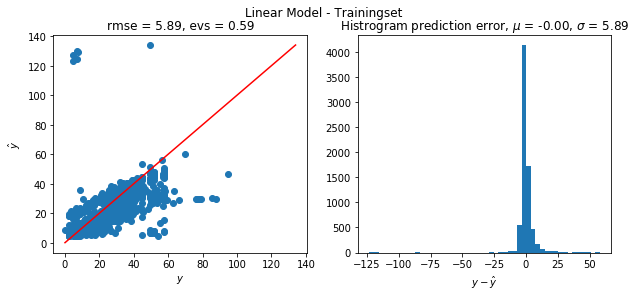

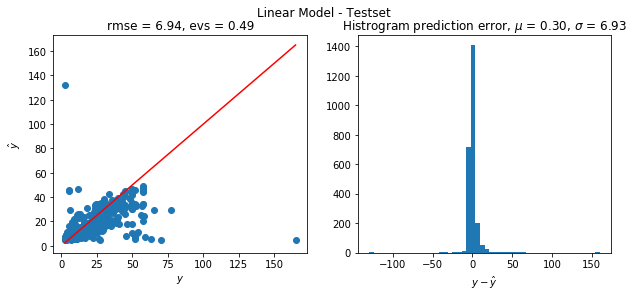

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(train1_x, train1_y)

y_train_pred = model_lin.predict(train1_x)
plot_prediction_analysis(train1_y, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(data1)
plot_prediction_analysis(Y[:len*1], y_test_pred, title='Linear Model - Testset')


In [95]:
data.iloc[2:5]

,fare_amount,passenger_count,isAirport,year,hour,distance
2,5.7,2,0,2011,0,0.863421
3,7.7,1,0,2012,4,1.739405
4,5.3,1,0,2010,7,1.242232


In [6]:
y = data.loc[:, 'fare_amount']
x = data.loc[:,'passenger_count':'distance']

In [8]:
train1 = pd.concat([data2,data3,data4],axis=0)
train2 = pd.concat([data1,data3,data4],axis=0)
train3 = pd.concat([data1,data2,data3],axis=0)
train4 = pd.concat([data1,data2,data3],axis=0)